In [1]:
%matplotlib notebook
%matplotlib inline

In [2]:
import pandas as pd
import matplotlib as plt
import numpy as np
from scipy import stats
import time
import matplotlib.pyplot as plt
import random


In [3]:
pd.read_csv('who_data.csv', encoding='latin-1')

,country,code,region,income,year,Current Health Expenditure % of GDP,Current Health Expenditure Per Capita (USD),Expenditure on Contraceptive Management as % of Current Health Expenditure,Population(thousands),Difference in POP,Population Growth Rate(%),Current Health Expenditure(millions USD),Contraceptive Management Per Capita (USD),Consumption Expenditure Per Capita(USD)
0,Algeria,DZA,AFR,Lower-middle,2001.0,3.837877,67.338501,NaN,31200.9855,426.3645,1.366510,2101.027653,NaN,766.939954
1,Algeria,DZA,AFR,Lower-middle,2002.0,3.730042,66.947601,NaN,31624.6955,423.7100,1.339807,2117.197412,NaN,789.431131
2,Algeria,DZA,AFR,Lower-middle,2003.0,3.601041,76.235474,NaN,32055.8835,431.1880,1.345113,2443.795446,NaN,857.045800
3,Algeria,DZA,AFR,Lower-middle,2004.0,3.544073,93.024330,NaN,32510.1860,454.3025,1.397416,3024.238369,NaN,1012.077808
4,Algeria,DZA,AFR,Lower-middle,2005.0,3.235161,101.303734,NaN,32956.6905,446.5045,1.354822,3338.635686,NaN,1057.167134
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3837,Viet Nam,VNM,WPR,Lower-middle,2016.0,4.518536,124.743996,NaN,93126.5285,935.1310,1.004151,11616.975970,NaN,1510.868980
3838,Viet Nam,VNM,WPR,Lower-middle,2017.0,4.712835,141.011383,NaN,94033.0480,906.5195,0.964044,13259.730550,NaN,1619.066173
3839,Viet Nam,VNM,WPR,Lower-middle,2018.0,5.049667,164.236679,NaN,94914.3305,881.2825,0.928503,15588.414850,NaN,1745.739718
3840,Viet Nam,VNM,WPR,Lower-middle,2019.0,5.033952,173.650452,NaN,95776.7165,862.3860,0.900413,16631.669070,NaN,1864.034871


In [6]:
who_df = pd.read_csv('who_data.csv', encoding='latin-1')
who_df.head()

,country,code,region,income,year,Current Health Expenditure % of GDP,Current Health Expenditure Per Capita (USD),Expenditure on Contraceptive Management as % of Current Health Expenditure,Population(thousands),Difference in POP,Population Growth Rate(%),Current Health Expenditure(millions USD),Contraceptive Management Per Capita (USD),Consumption Expenditure Per Capita(USD)
0,Algeria,DZA,AFR,Lower-middle,2001.0,3.837877,67.338501,NaN,31200.9855,426.3645,1.366510,2101.027653,NaN,766.939954
1,Algeria,DZA,AFR,Lower-middle,2002.0,3.730042,66.947601,NaN,31624.6955,423.7100,1.339807,2117.197412,NaN,789.431131
2,Algeria,DZA,AFR,Lower-middle,2003.0,3.601041,76.235474,NaN,32055.8835,431.1880,1.345113,2443.795446,NaN,857.045800
3,Algeria,DZA,AFR,Lower-middle,2004.0,3.544073,93.024330,NaN,32510.1860,454.3025,1.397416,3024.238369,NaN,1012.077808
4,Algeria,DZA,AFR,Lower-middle,2005.0,3.235161,101.303734,NaN,32956.6905,446.5045,1.354822,3338.635686,NaN,1057.167134


In [8]:
who_df.rename(columns={'Column1':'Population Growth Rate(%)','che_gdp':'Current Health Expenditure % of GDP',
                       'che_pc_usd':'Current Health Expenditure Per Capita (USD)',
                       'dis23_che':'Expenditure on Contraceptive Management as % of Current Health Expenditure',
                      'pop':'Population(thousands)', 'che_usd':'Current Health Expenditure(millions USD)',
                      'dis23_usd_pc':'Contraceptive Management Per Capita (USD)',
                      'pfc_usd_pc':'Consumption Expenditure Per Capita(USD)'},inplace=True)



In [9]:
who_df.replace(',','', regex=True, inplace=True)

In [20]:
who_df.head()

,country,code,region,income,year,Current Health Expenditure % of GDP,Current Health Expenditure Per Capita (USD),Expenditure on Contraceptive Management as % of Current Health Expenditure,Population(thousands),Difference in POP,Population Growth Rate(%),Current Health Expenditure(millions USD),Contraceptive Management Per Capita (USD),Consumption Expenditure Per Capita(USD)
0,Algeria,DZA,AFR,Lower-middle,2001.0,3.837877,67.338501,NaN,31200.9855,426.3645,1.366510,2101.027653,NaN,766.939954
1,Algeria,DZA,AFR,Lower-middle,2002.0,3.730042,66.947601,NaN,31624.6955,423.7100,1.339807,2117.197412,NaN,789.431131
2,Algeria,DZA,AFR,Lower-middle,2003.0,3.601041,76.235474,NaN,32055.8835,431.1880,1.345113,2443.795446,NaN,857.045800
3,Algeria,DZA,AFR,Lower-middle,2004.0,3.544073,93.024330,NaN,32510.1860,454.3025,1.397416,3024.238369,NaN,1012.077808
4,Algeria,DZA,AFR,Lower-middle,2005.0,3.235161,101.303734,NaN,32956.6905,446.5045,1.354822,3338.635686,NaN,1057.167134


In [11]:
who_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3842 entries, 0 to 3841
Data columns (total 14 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   country                                                                     3840 non-null   object 
 1   code                                                                        3840 non-null   object 
 2   region                                                                      3840 non-null   object 
 3   income                                                                      3840 non-null   object 
 4   year                                                                        3840 non-null   float64
 5   Current Health Expenditure % of GDP                                         3774 non-null   float64
 6   Current Health Expenditure Per Capita (USD)     

In [12]:
who_df.iloc[:,4:]=who_df.iloc[:,4:].astype(np.float64,errors='ignore')

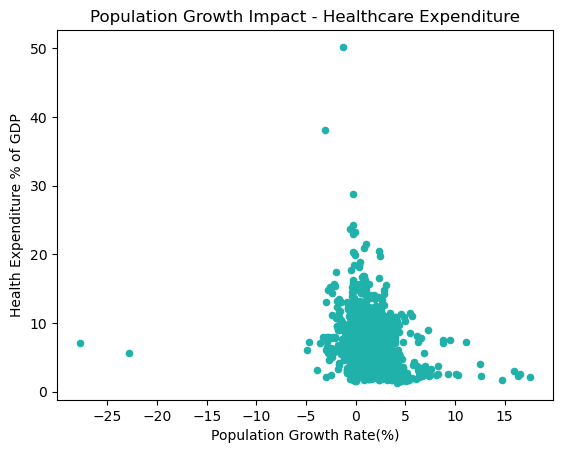

In [27]:
who_df.plot(
    x='Population Growth Rate(%)', 
    y='Current Health Expenditure % of GDP',
    kind ='scatter',color='lightseagreen',
    title = 'Population Growth Impact - Healthcare Expenditure',
    xlabel = 'Population Growth Rate(%)',
    ylabel = 'Health Expenditure % of GDP',
    xticks=np.arange(-25, 20,5)
    )
plt.savefig('Population Growth Impact - Healthcare Expenditure')
plt.show()

In [18]:
group_country_df = who_df.groupby(['country'])

group_country_df=group_country_df[['Population Growth Rate(%)', 'Current Health Expenditure % of GDP']].mean().reset_index()


In [19]:
five_high_country_df = group_country_df.sort_values('Current Health Expenditure % of GDP',ascending=False).head(5)
five_high_country_df

,country,Population Growth Rate(%),Current Health Expenditure % of GDP
125,Niue,-0.335095,16.459147
183,United States of America,0.864247,15.730271
106,Marshall Islands,-1.123813,14.894904
176,Tuvalu,0.687751,14.341414
118,Nauru,0.847082,12.401915


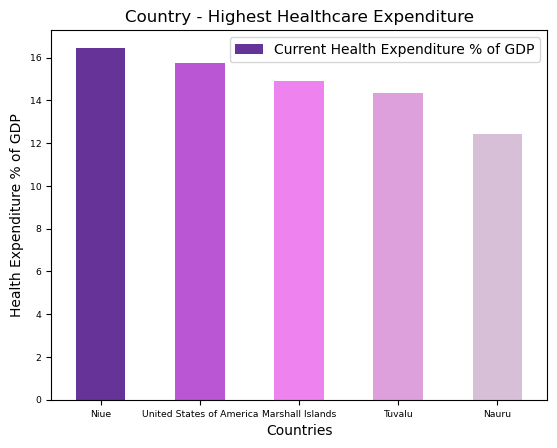

In [61]:
five_high_country_df.plot(
    x='country',
    y='Current Health Expenditure % of GDP',
    kind ='bar',color=tuple(["rebeccapurple", "mediumorchid","violet","plum","thistle"]),
    title = 'Country - Highest Healthcare Expenditure',
    xlabel = 'Countries',fontsize = 6.7,
    ylabel = 'Health Expenditure % of GDP',
)

plt.xticks(rotation=0)
plt.savefig('Country - Highest Healthcare Expenditure')
plt.show()